# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [ ]:
train_data = pd.read_csv('train_data.txt', sep = ':::', engine = 'python', names = ['Title', 'Genre', 'Description'] )
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data = pd.read_csv('test_data.txt', sep = ':::', engine = 'python', names = ['ID', 'Title',
                                                                                  'Description'])
test_data.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17552 entries, 1 to 17552
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        17552 non-null  object
 1   Genre        17552 non-null  object
 2   Description  17552 non-null  object
dtypes: object(3)
memory usage: 548.5+ KB


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

# Genre Distribution

Text(0, 0.5, 'Count')

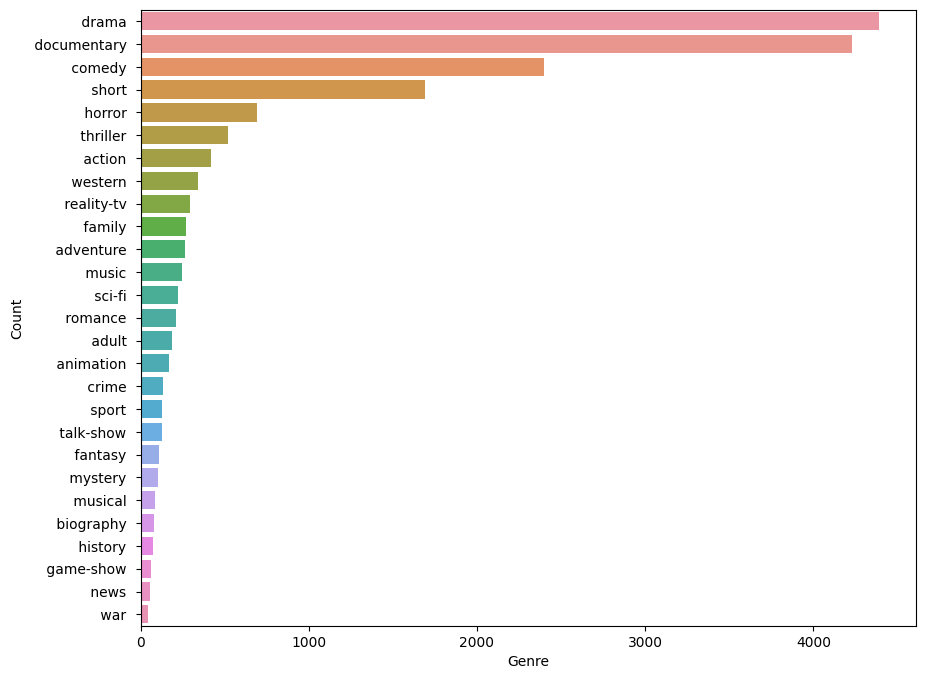

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h')
plt.xlabel('Genre')
plt.ylabel('Count')

In [ ]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


# Data preprocessing

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):

    text = text.lower()
    text = re.sub('-',' ',text.lower())
    text = re.sub(f'[{string.digits}]',' ',text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text =  re.sub(r'@\S+', '',text)
    text =  re.sub(r'http\S+', '',text)
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]','',text)


In [ ]:
msg = "Hello! How are you doing - hope you are doing fine #$!90@"
print(f'Original text: {msg}')
print(f'Cleaned text: {clean_text(msg)}')

Original text: Hello! How are you doing - hope you are doing fine #$!90@
Cleaned text: hello hop fin


In [ ]:
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)

In [ ]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


# Text Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

In [ ]:
test_data_solution = pd.read_csv('test_data_solution.txt', sep = ':::', engine = 'python'
, names = ['ID', 'Title', 'Genre', 'Description'])
test_data_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# TF-IDF

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

# LSTM

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.models import Sequential

In [ ]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
Callbacks  = [EarlyStopping(monitor='val_loss',min_delta=0, patience=2, mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=Callbacks)

Epoch 1/6
1695/1695 [==============================] - 611s 359ms/step - loss: 1.9783 - accuracy: 0.4231 - val_loss: 1.6773 - val_accuracy: 0.5089
Epoch 2/6
1695/1695 [==============================] - 613s 362ms/step - loss: 1.4610 - accuracy: 0.5771 - val_loss: 1.5503 - val_accuracy: 0.5511
Epoch 3/6
1695/1695 [==============================] - 608s 359ms/step - loss: 1.1211 - accuracy: 0.6748 - val_loss: 1.5630 - val_accuracy: 0.5481
Epoch 4/6
1695/1695 [==============================] - 608s 359ms/step - loss: 0.8375 - accuracy: 0.7567 - val_loss: 1.7010 - val_accuracy: 0.5382


# Accuracy of the model

In [ ]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
predicted_labels = y_pred.argmax(axis = 1)
true_labels = y_test.argmax(axis = 1)

In [ ]:
ac = f1_score(true_labels, predicted_labels, average = 'weighted')
print("f1 score:", ac)
